# improving features? 

In [1]:
# import toolboxes
import pandas as pd 
import numpy as np
import os
from collections import Counter
import matplotlib.pyplot as plt
from scipy import signal
import statistics as stats
from scipy.stats import entropy
import pywt
import seaborn as sns

In [2]:
directory = '/Users/amandabreton/Documents/Duke 2022-2023/ECE 590/Final Project/confused_dataset/'
filename = 'EEG_data.csv'

df = pd.read_csv(directory+filename)

In [3]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [4]:
# this is time series information 
# let's just look at a single theta wave to get an idea 
sample = df.loc[(df['SubjectID'] == 0) & (df['VideoID'] == 0)].copy()

In [5]:
sample.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


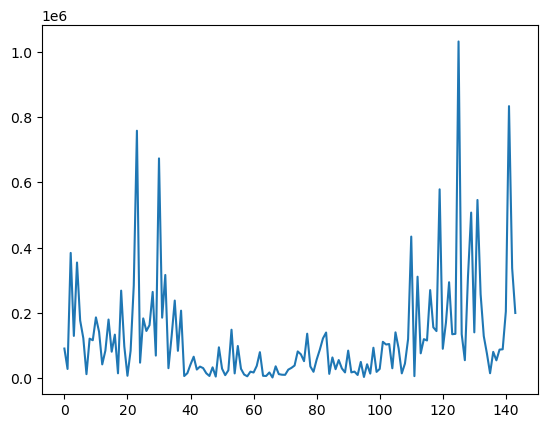

In [6]:
plt.plot(sample['Theta'])

In [7]:
#(cA, cD) = pywt.dwt([sample['Theta']], 'db4')
#print(cD.shape)

# this paper seems interesting: 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9138093/

In [8]:
# features?? average eeg value and power (welch method), min and max? distribution? 
# then use the seaborn plot to look at correlation? 


In [15]:
#eeg_arr = np.zeros((100,20))
eeg_arr = np.zeros((100,12))
fs = 8 # Hz
counter = 0
for i in range(10):
    for j in range(10):
        curr = df.loc[(df['SubjectID'] == i) & (df['VideoID'] == j)].copy() #SubjectID, VideoID 
        
        curr_attention = np.mean([curr['Attention']])
        curr_mediation = np.mean([curr['Mediation']])
        curr_theta = np.mean([curr['Theta']])
        var_theta = stats.variance(curr['Theta'])
        len_theta = len(curr['Theta'])
        f, Pxx_den = signal.welch(curr['Theta'], fs, nperseg = len_theta)
        psd_den = np.mean(Pxx_den)
        min_psd = np.min(Pxx_den)  
        max_psd = np.min(Pxx_den)    
        var_psd = stats.variance(Pxx_den) 
        
        #curr_raw = np.mean([curr['Raw']])
        #curr_delta = np.mean([curr['Delta']])
        #curr_alpha1 = np.mean([curr['Alpha1']])
        #curr_alpha2 = np.mean([curr['Alpha2']])
        #curr_beta1 = np.mean([curr['Beta1']])
        #curr_beta2 = np.mean([curr['Beta2']])
        #curr_gamma1 = np.mean([curr['Gamma1']])
        #curr_gamma2 = np.mean([curr['Gamma2']])
               
        user_label = np.mean(curr['user-definedlabeln'])
        pre_label = np.mean(curr['predefinedlabel'])
        
        #eeg_arr[counter,:] = [i,j,pre_label, user_label,curr_attention, curr_mediation, curr_theta, 
        #                      var_theta, psd_den, min_psd, max_psd, var_psd, curr_raw,curr_delta, 
        #                      curr_alpha1,curr_alpha2, curr_beta1, curr_beta2, curr_gamma1, curr_gamma2]
        eeg_arr[counter,:] = [i,j,pre_label, user_label,curr_attention, curr_mediation, curr_theta, 
                              var_theta, psd_den, min_psd, max_psd, var_psd]
        
        counter +=1       
        

StatisticsError: variance requires at least two data points

In [10]:
df = pd.DataFrame(eeg_arr, columns = ['SubjectID', 'VideoID', 'predefinedlabel', 'user-definedlabel', 
                                      'Attention', 'Mediation', 'Theta', 'Theta Variance', 
                                      'Mean Theta Power', 'Min Theta Power', 'Max Theta Power', 
                                      'Variance Power', 'Raw', 'Delta', 'Alpha1', 'Alpha2', 
                                      'Beta1', 'Beta2', 'Gamma1', 'Gamma2'])

In [11]:
df.head()

,SubjectID,VideoID,predefinedlabel,user-definedlabel,Attention,Mediation,Theta,Theta Variance,Mean Theta Power,Min Theta Power,Max Theta Power,Variance Power,Raw,Delta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,0.0,0.0,0.0,0.0,55.256944,53.826389,124965.590278,2.663518e+10,2.554595e+09,1.218802e+07,1.218802e+07,7.429940e+19,46.986111,544315.097222,36693.701389,25875.298611,20108.791667,40268.763889,40729.284722,16817.062500
1,0.0,1.0,0.0,1.0,43.621429,48.621429,161064.228571,2.731595e+10,7.300378e+09,1.340687e+08,1.340687e+08,4.624979e+19,28.800000,739737.292857,34918.028571,25078.935714,22157.307143,37410.728571,36758.700000,14519.407143
2,0.0,2.0,0.0,1.0,43.978873,47.316901,149816.873239,2.774524e+10,9.831968e+09,1.159827e+08,1.159827e+08,9.925079e+19,13.154930,694078.084507,30493.873239,21667.591549,21888.338028,36446.436620,33908.873239,14545.845070
3,0.0,3.0,0.0,0.0,51.057377,51.844262,162653.360656,6.780457e+10,5.956893e+09,8.767184e+07,8.767184e+07,4.640217e+19,34.713115,600823.688525,33367.278689,26281.500000,17224.278689,43706.524590,41438.213115,16558.631148
4,0.0,4.0,0.0,0.0,55.224138,47.474138,126893.948276,3.289254e+10,8.792100e+09,6.246923e+07,6.246923e+07,1.031093e+20,30.008621,546628.017241,23113.844828,17017.051724,15955.879310,36427.836207,36024.818966,14752.655172


In [12]:
df.shape

(100, 20)

<Axes: >

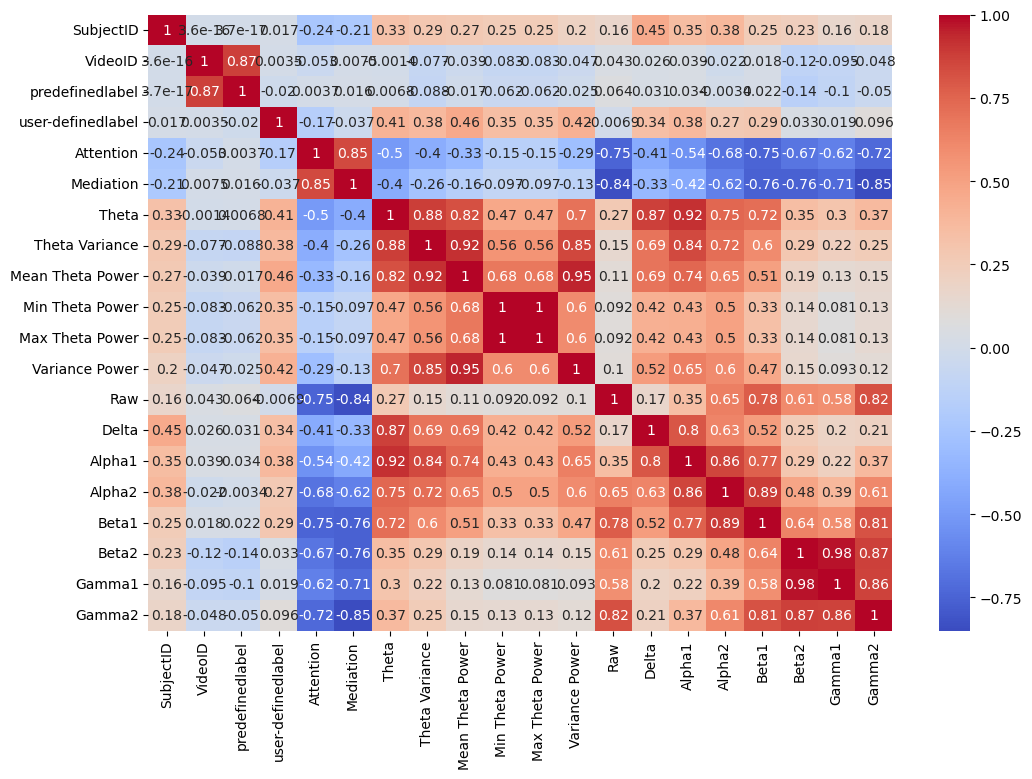

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [14]:
# plot each variables scatter plot with target variable
features = df.drop(['SubjectID', 'VideoID', 'user-definedlabel', 'predefinedlabel'
                            ], axis=1)
sns.pairplot(df, hue="user-definedlabel")

Error in callback <function flush_figures at 0x7fb97c089dc0> (for post_execute):


KeyboardInterrupt: 

/Users/amandabreton/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.516e+00, tolerance: 2.499e-03
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'Feature')

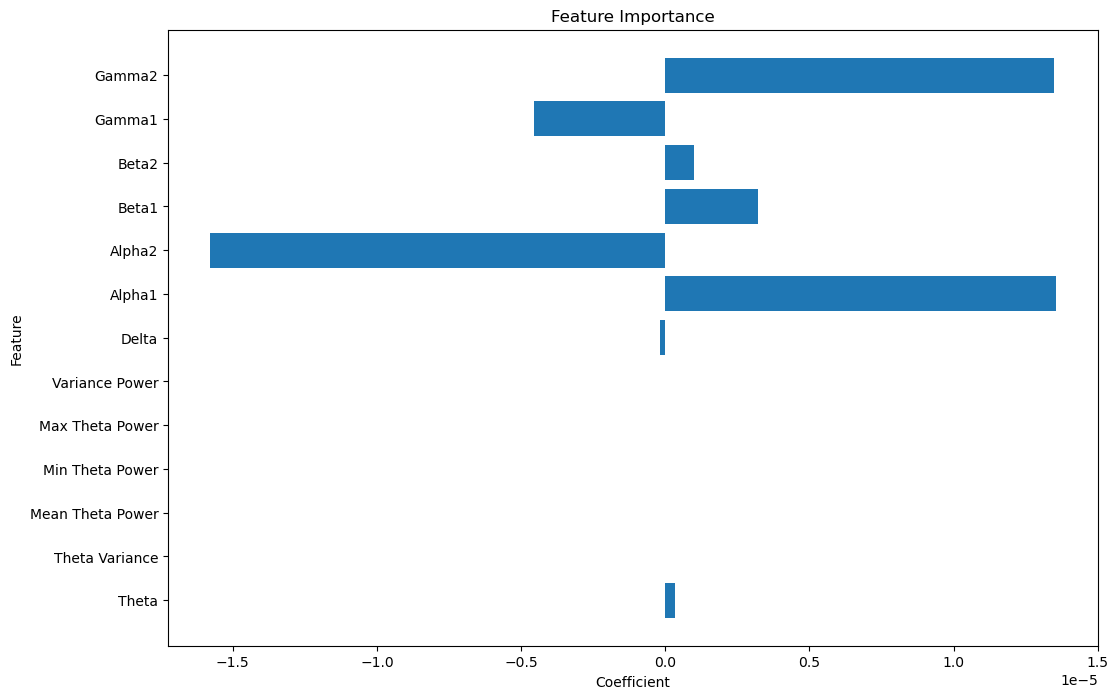

In [14]:
# make a lasso model
from sklearn.linear_model import Lasso

# split data into X and y
X = df.drop(["user-definedlabel", "SubjectID", "VideoID", 'predefinedlabel', 'Mediation', 'Attention', 'Raw'], axis=1)
y = df["user-definedlabel"]

# instantiate lasso model
lasso = Lasso(alpha=0.01)

# fit lasso model
lasso.fit(X, y)

# plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(X.columns, lasso.coef_)
plt.title("Feature Importance")
plt.xlabel("Coefficient")
plt.ylabel("Feature")

In [15]:
def pick_model(model_type, C=1,verb=False):
    if model_type == 'logreg':
        clf = LogisticRegression()
        param_grid = {"C": [0.1, 1, 10, 100], "penalty": ["l1", "l2"], "solver": ["liblinear"]}
    elif model_type == 'rvm':
        clf = BayesianRidge(compute_score=True)
        param_grid = {"alpha_1": [1e-6, 1e-5, 1e-4, 1e-3], "alpha_2": [1e-6, 1e-5, 1e-4, 1e-3], 
                      "lambda_1": [1e-6, 1e-5, 1e-4, 1e-3], "lambda_2": [1e-6, 1e-5, 1e-4, 1e-3]}
    elif model_type == 'knn':
        clf = KNeighborsClassifier(n_neighbors=5)
        Ns = [1,2,3,4]
        param_grid = {"n_neighbors": Ns}
    elif model_type == 'svm':
        clf = LinearSVC(C=C,verbose=verb, max_iter=10000)
        Cs = np.logspace(-11,6,18)
        param_grid = {"C": Cs, "penalty": ["l2"], "loss": ['hinge', 'squared_hinge']} 
    elif model_type == 'random forest': 
        clf = RandomForestClassifier()
        param_grid = {"n_estimators": [10, 50, 100, 200, 500, 1000], "max_depth": 
                      [None, 5, 10, 20, 50, 100]}
    elif model_type == 'decision tree': 
        clf = DecisionTreeClassifier()
        param_grid = {'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random']}
    else: #model_type = naivebayes
        clf = GaussianNB()
        param_grid = {}
    return clf, param_grid

In [16]:
def studentspecificCV(df,verb=False, model_type = 'svm', target = 'user-definedlabel'):
    # training on half the videos testing on the other half in a single student
    accs = np.zeros(50)
    counter = 0
    for i in range(10): 
        curr_student = df.loc[df['SubjectID'] == i]
        X = curr_student.drop(['SubjectID', 'VideoID', 'user-definedlabel', 'predefinedlabel'], axis=1)
        y = curr_student[[target]]
        y = y[target].values
        num_splits = KFold(n_splits=5,shuffle = True)
        for train_index, test_index in tqdm(num_splits.split(X)): # to actually split into training/testing
            
            #X.iloc[0].values
            X_train, X_test = X.iloc[train_index].values, X.iloc[test_index].values
            y_train, y_test = y[train_index], y[test_index]
    
            # Create an instance of the  model
            model, param_grid = pick_model(model_type)
            # Create an instance of the GridSearchCV object
            grid_search = GridSearchCV(model, param_grid, cv=2, scoring="accuracy")
            # Fit the GridSearchCV object to the data
            grid_search.fit(X_train, y_train)
            # Print the best hyperparameters and their accuracy score
            #print("Training: Best Hyperparameters:", grid_search.best_params_)
            #print("Training: Best Accuracy Score:", grid_search.best_score_)
            best_est = grid_search.best_estimator_
            best_est.fit(X_train, y_train)
            y_pred = best_est.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            accs[counter] = acc
            #print('Test accuracy for target:', target, acc)
            counter += 1 
    print('Average Test Accuracy: ', np.mean(accs))

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from tqdm import tqdm
from sklearn.linear_model import BayesianRidge
from sklearn.feature_selection import SelectFromModel
from sklearn.kernel_approximation import RBFSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [36]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [37]:
studentspecificCV(df,verb=False, model_type = 'logreg', target = 'user-definedlabel')

5it [00:00, 12.69it/s]
5it [00:00, 26.07it/s]
5it [00:00, 25.02it/s]
5it [00:00, 12.04it/s]
5it [00:00, 19.70it/s]
5it [00:00, 25.31it/s]
5it [00:00, 29.41it/s]
5it [00:00, 30.46it/s]
5it [00:00, 16.65it/s]
5it [00:00, 29.14it/s]

Average Test Accuracy:  0.71


In [38]:
studentspecificCV(df,verb=False, model_type = 'knn', target = 'user-definedlabel')

5it [00:00, 33.32it/s]
5it [00:00, 33.01it/s]
5it [00:00, 33.83it/s]
5it [00:00, 37.37it/s]
5it [00:00, 37.52it/s]
5it [00:00, 38.10it/s]
5it [00:00, 37.60it/s]
5it [00:00, 36.75it/s]
5it [00:00, 37.33it/s]
5it [00:00, 38.28it/s]

Average Test Accuracy:  0.7


In [39]:
studentspecificCV(df,verb=False, model_type = 'random forest', target = 'user-definedlabel')

5it [02:34, 30.95s/it]
5it [02:49, 33.85s/it]
5it [02:29, 29.89s/it]
5it [02:44, 32.92s/it]
5it [02:40, 32.04s/it]
5it [03:11, 38.22s/it]
5it [03:29, 41.99s/it]
5it [03:27, 41.58s/it]
5it [03:22, 40.47s/it]
5it [03:32, 42.54s/it]

Average Test Accuracy:  0.82


In [40]:
studentspecificCV(df,verb=False, model_type = 'naivebayes', target = 'user-definedlabel')

5it [00:00, 112.54it/s]
5it [00:00, 117.03it/s]
5it [00:00, 117.21it/s]
5it [00:00, 106.18it/s]
5it [00:00, 115.45it/s]
5it [00:00, 96.91it/s]
5it [00:00, 117.62it/s]
5it [00:00, 119.51it/s]
5it [00:00, 114.61it/s]
5it [00:00, 121.33it/s]

Average Test Accuracy:  0.75


In [41]:
curr_student = df.loc[df['SubjectID'] == 0]
X_train = curr_student.drop(['SubjectID', 'VideoID', 'user-definedlabel', 'predefinedlabel'
                            ], axis=1)
target = 'user-definedlabel'
y = curr_student[[target]]
y_train = y[target].values
from sklearn.pipeline import Pipeline    
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

#num_splits = KFold(n_splits=5,shuffle = True)
#for train_index, test_index in tqdm(num_splits.split(X)): # to actually split into training/testing

#X_train, X_test = X.iloc[train_index].values, X.iloc[test_index].values
#y_train, y_test = y[train_index], y[test_index]

model_type = 'naivebayes'
model, param_grid = pick_model(model_type)          
#grid_search = GridSearchCV(model, param_grid, cv=2, scoring="accuracy")
grid_search = GridSearchCV(pipeline, {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=0
                      )
#grid_search.best_params_
grid_search.fit(X_train, y_train)            
best_est = grid_search.best_estimator_
est_fit = best_est.fit(X_train, y_train)

coefficients = grid_search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
#print(importance)

In [33]:
importance

array([0.08994605, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02964226, 0.31547822,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [34]:
features = X_train.columns
np.array(features)[importance > 0]


array(['Attention', 'Raw', 'Delta'], dtype=object)